# Data Analysis and Model Training for Predicting House Prices
Hamza Al Habash

This notebook demonstrates the process of loading, exploring, preprocessing data, training multiple models, evaluating their performance, and suggesting potential improvements.

## 1. Loading and Exploring Data


### Loading Libraries and Data

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of the training dataset
train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Counting Missing Values

In [70]:
# Count missing values per column
missing_values_count = train_df.isnull().sum()
print('Missing values count per column:')
print(missing_values_count)


Missing values count per column:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


Markdown for Handling Missing Values

## 2. Handling Missing Values
We will fill missing values for numerical columns with the median and for categorical columns with the mode.


In [71]:
# Handling missing values
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[num_cols] = train_df[num_cols].apply(lambda x: x.fillna(x.median()))

cat_cols = train_df.select_dtypes(exclude=['float64', 'int64']).columns
train_df[cat_cols] = train_df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify there are no missing values
missing_values = train_df.isnull().sum().sum()
print(f'Total missing values after filling: {missing_values}')


Total missing values after filling: 0


## 3. Data Preprocessing
Scaling numerical features and encoding categorical features using one-hot encoding.


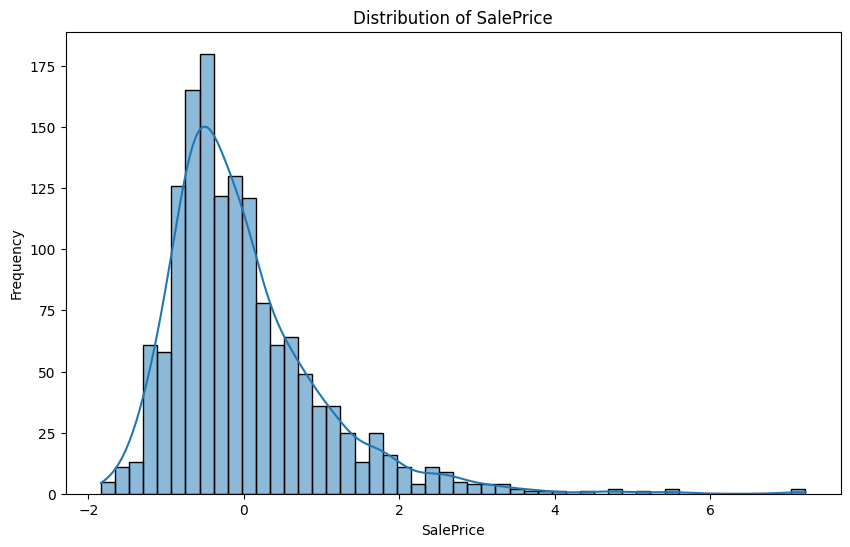

In [72]:
# Extract numerical features and scale them
scaler = StandardScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])

# Visualize the distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], bins=50, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


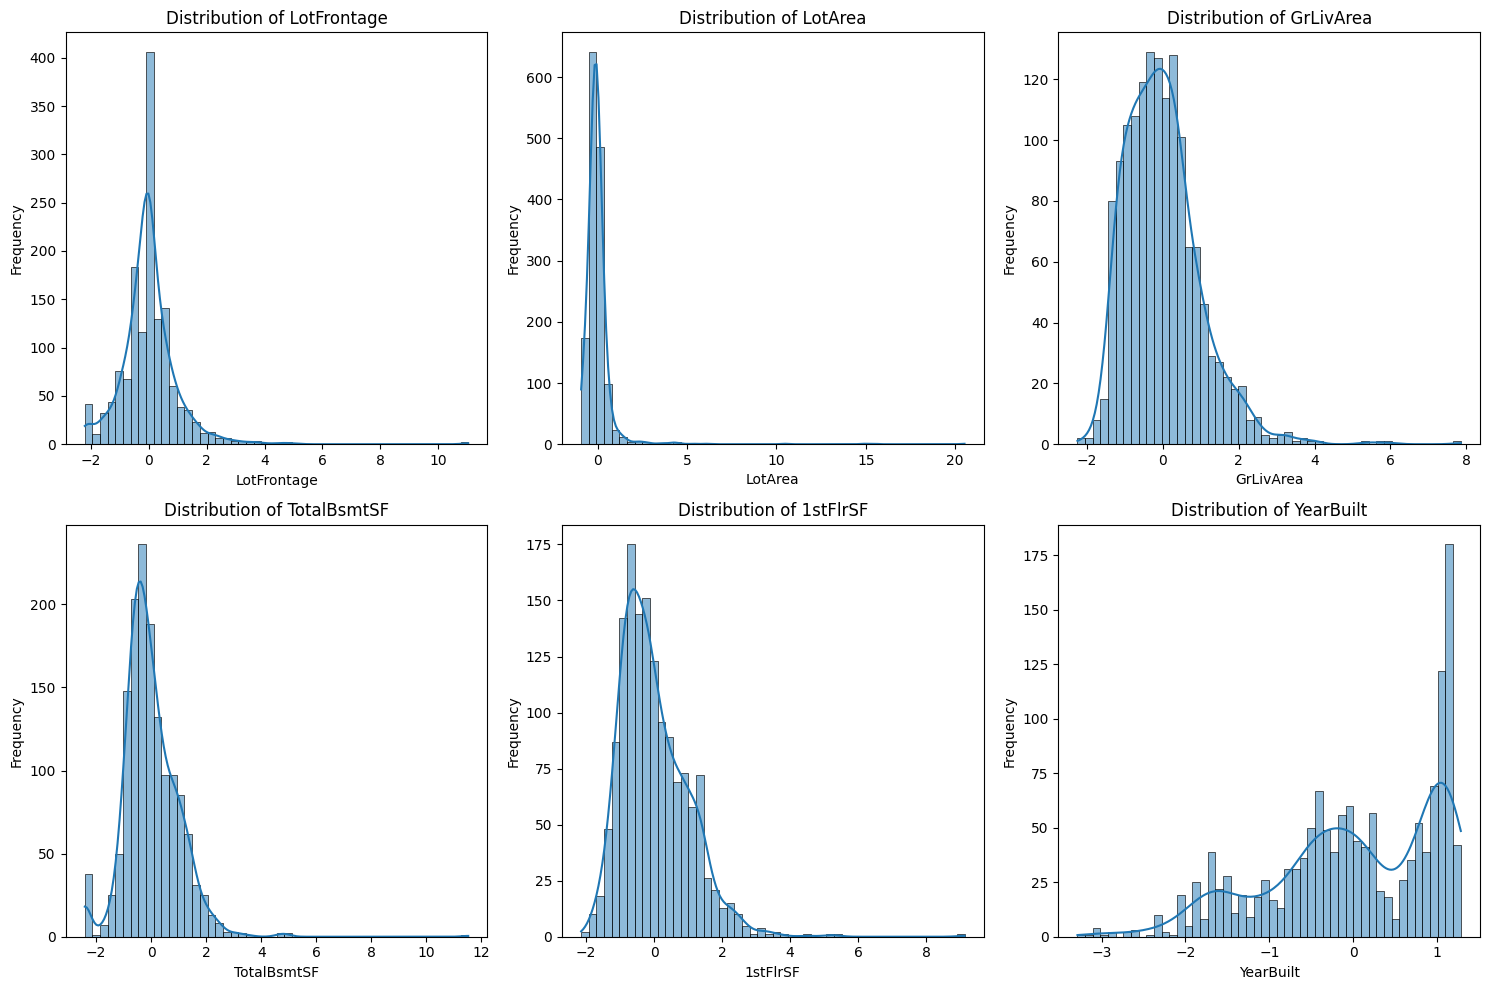

In [73]:
# Plot the distributions of key numerical features
num_features = ['LotFrontage', 'LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


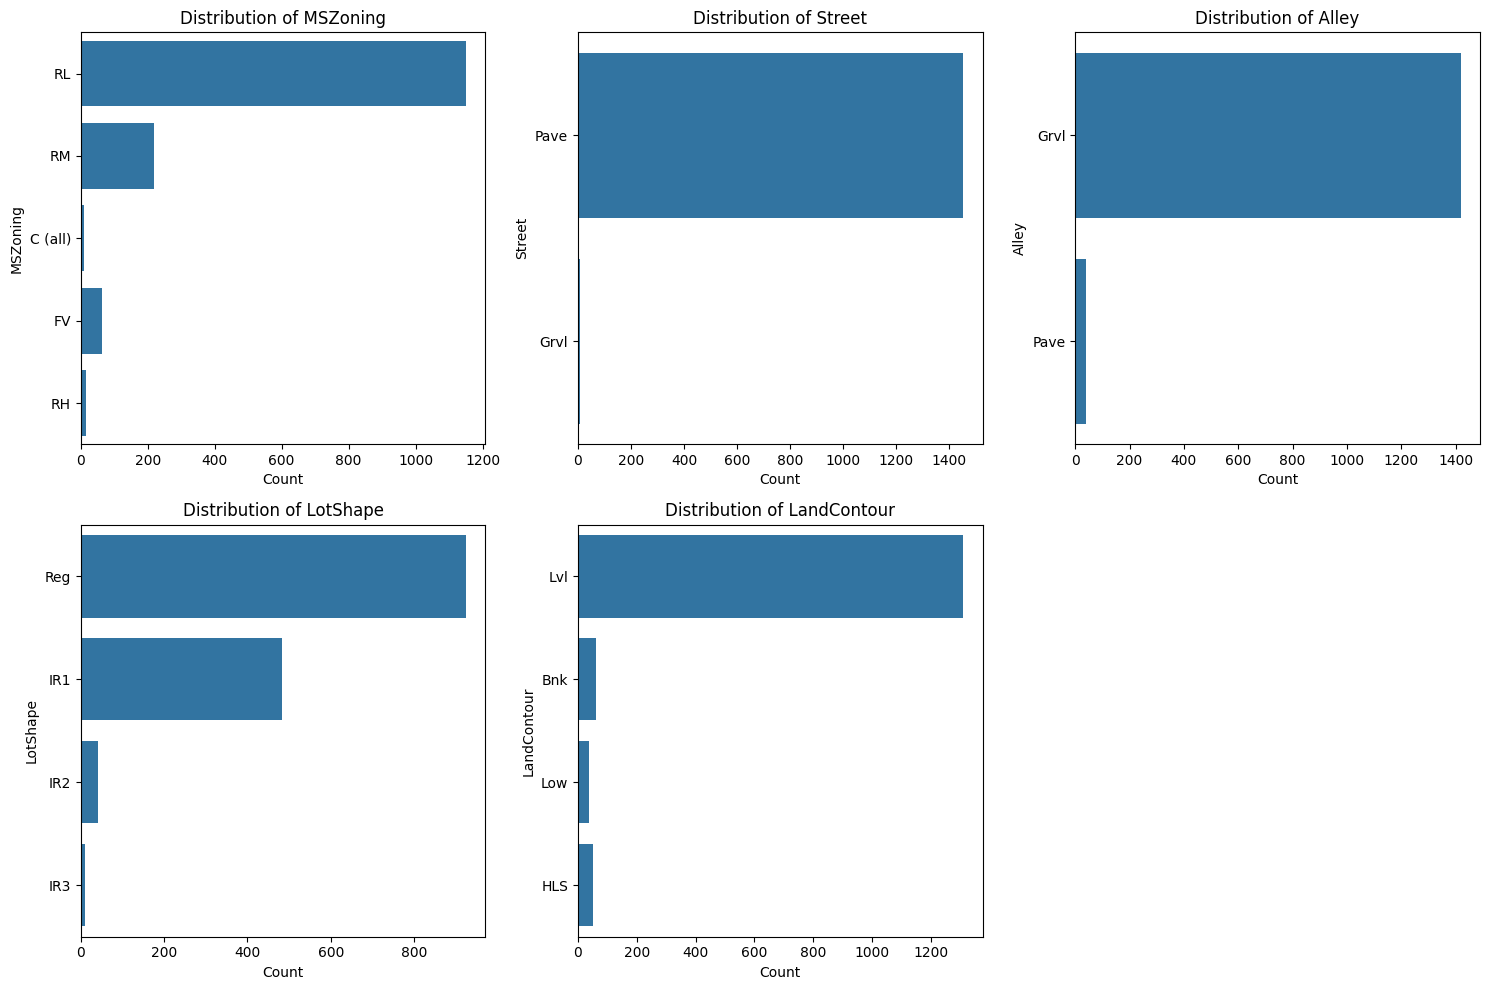

In [74]:
# Plot the distributions of key categorical features
cat_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=train_df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


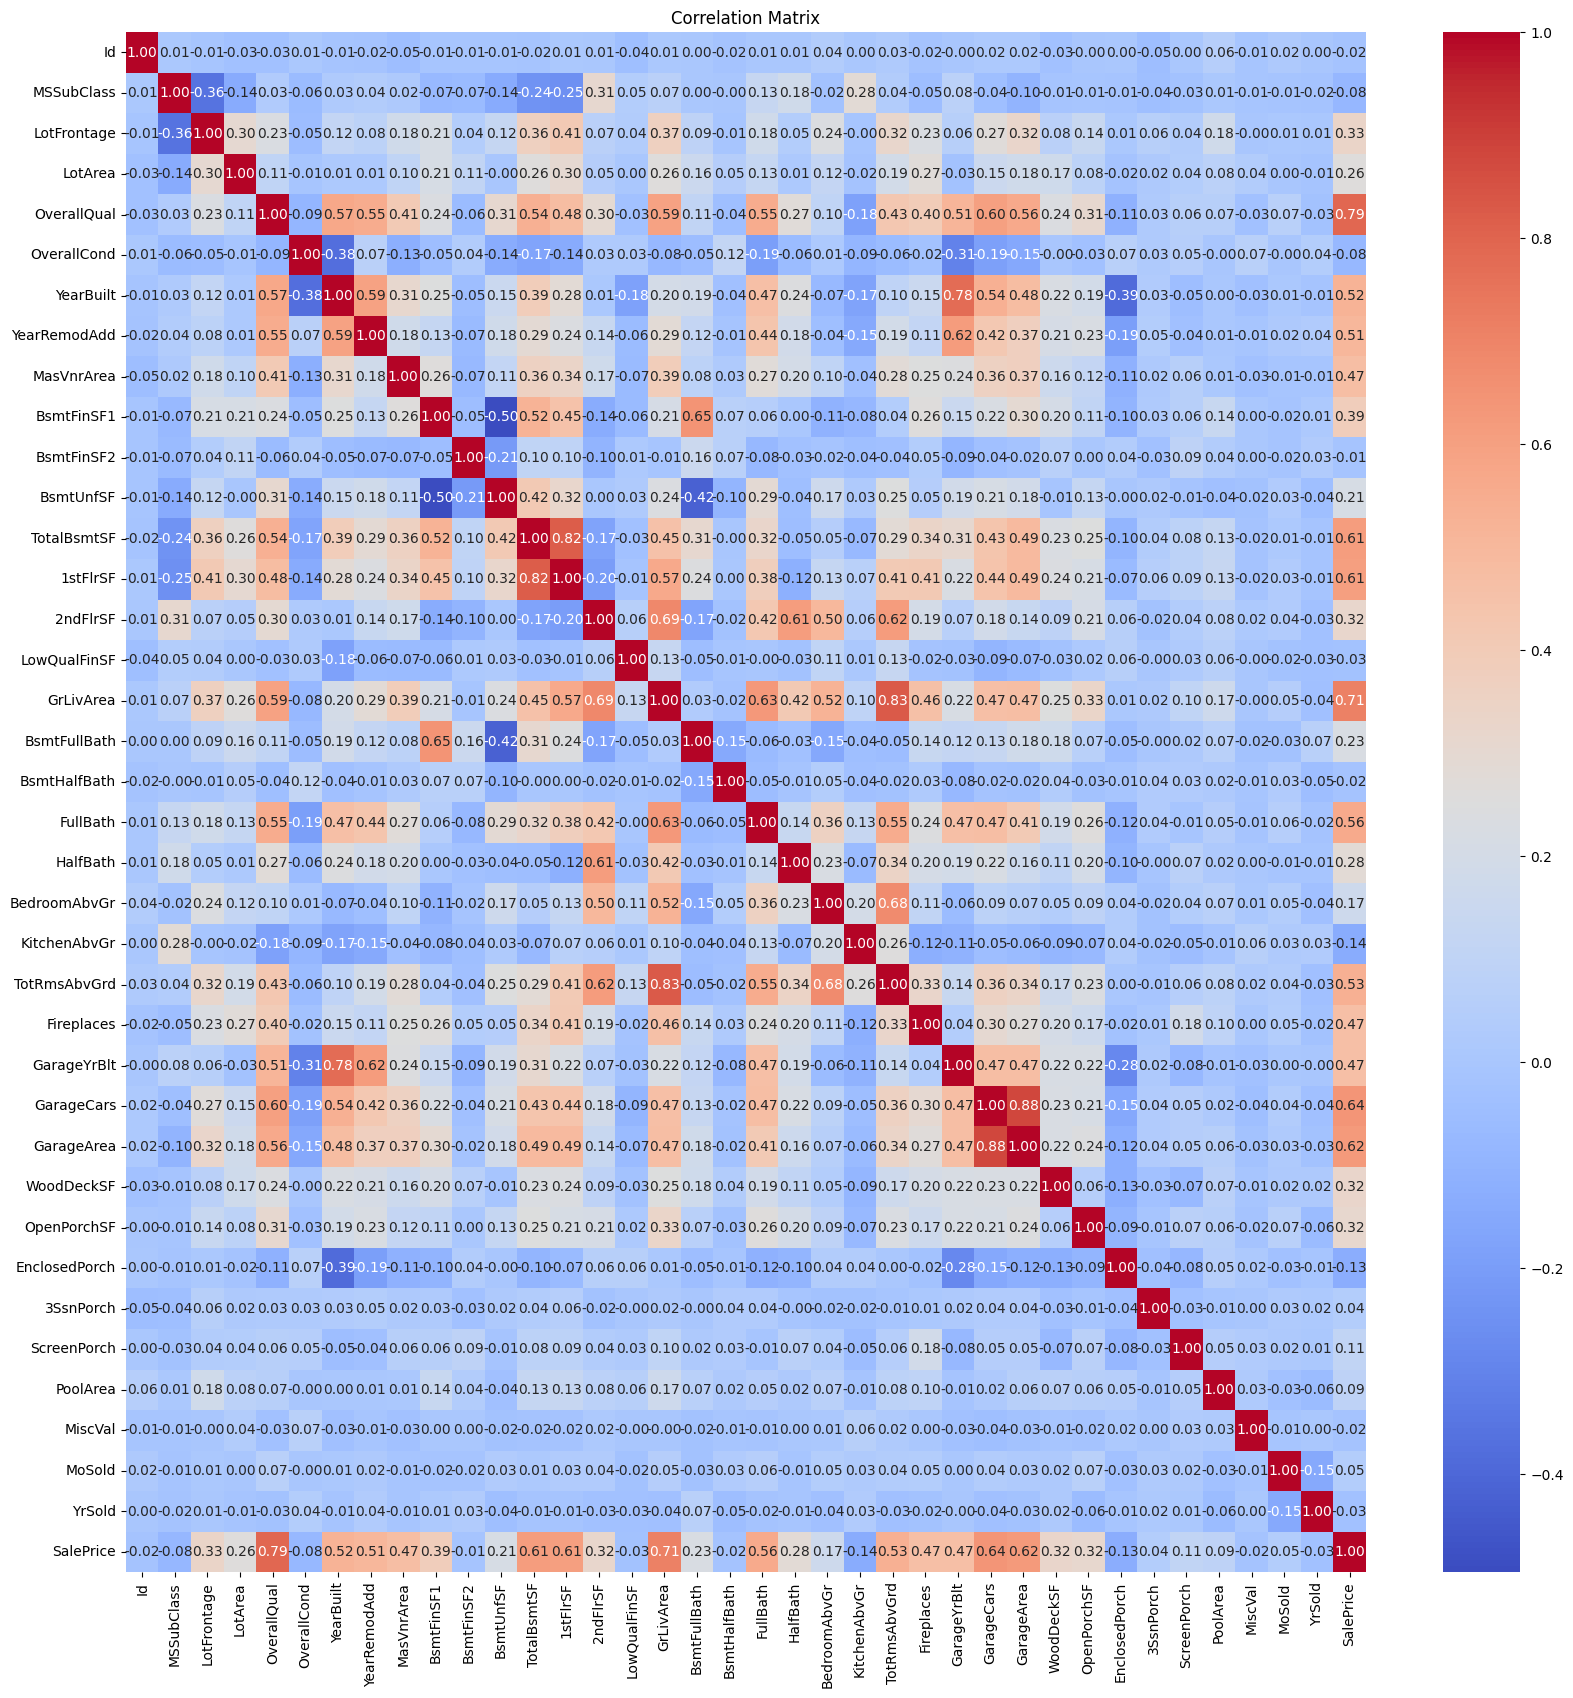

In [75]:
# Compute and visualize the correlation matrix for numerical features only
plt.figure(figsize=(20, 20))
numeric_features = train_df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_df[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


In [76]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,RL,-0.220875,-0.207142,Pave,Grvl,Reg,Lvl,AllPub,...,-0.068692,Gd,MnPrv,Shed,-0.087688,-1.599111,0.138777,WD,Normal,0.347273
1,-1.728492,-0.872563,RL,0.460320,-0.091886,Pave,Grvl,Reg,Lvl,AllPub,...,-0.068692,Gd,MnPrv,Shed,-0.087688,-0.489110,-0.614439,WD,Normal,0.007288
2,-1.726120,0.073375,RL,-0.084636,0.073480,Pave,Grvl,IR1,Lvl,AllPub,...,-0.068692,Gd,MnPrv,Shed,-0.087688,0.990891,0.138777,WD,Normal,0.536154
3,-1.723747,0.309859,RL,-0.447940,-0.096897,Pave,Grvl,IR1,Lvl,AllPub,...,-0.068692,Gd,MnPrv,Shed,-0.087688,-1.599111,-1.367655,WD,Abnorml,-0.515281
4,-1.721374,0.073375,RL,0.641972,0.375148,Pave,Grvl,IR1,Lvl,AllPub,...,-0.068692,Gd,MnPrv,Shed,-0.087688,2.100892,0.138777,WD,Normal,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,RL,-0.357114,-0.260560,Pave,Grvl,Reg,Lvl,AllPub,...,-0.068692,Gd,MnPrv,Shed,-0.087688,0.620891,-0.614439,WD,Normal,-0.074560
1456,1.723747,-0.872563,RL,0.687385,0.266407,Pave,Grvl,Reg,Lvl,AllPub,...,-0.068692,Gd,MnPrv,Shed,-0.087688,-1.599111,1.645210,WD,Normal,0.366161
1457,1.726120,0.309859,RL,-0.175462,-0.147810,Pave,Grvl,Reg,Lvl,AllPub,...,-0.068692,Gd,GdPrv,Shed,4.953112,-0.489110,1.645210,WD,Normal,1.077611
1458,1.728492,-0.872563,RL,-0.084636,-0.080160,Pave,Grvl,Reg,Lvl,AllPub,...,-0.068692,Gd,MnPrv,Shed,-0.087688,-0.859110,1.645210,WD,Normal,-0.488523


## 4. Model Training and Evaluation
Training multiple models and evaluating their performance.


In [77]:
# One-hot encode categorical features
train_df_encoded = pd.get_dummies(train_df, columns=cat_cols, drop_first=True)


In [78]:
train_df_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,False,False,False,False,True,False,False,False,True,False
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,False,False,False,False,True,False,False,False,True,False
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,False,False,False,False,True,False,False,False,True,False
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,...,False,False,False,False,True,False,False,False,False,False
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,...,False,False,False,False,True,False,False,False,True,False
1456,1.723747,-0.872563,0.687385,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,...,False,False,False,False,True,False,False,False,True,False
1457,1.726120,0.309859,-0.175462,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,...,False,False,False,False,True,False,False,False,True,False
1458,1.728492,-0.872563,-0.084636,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,...,False,False,False,False,True,False,False,False,True,False


In [79]:
# Split the data into X (features) and y (target)
X_train = train_df_encoded.drop(['SalePrice', 'Id'], axis=1)
y_train = train_df_encoded['SalePrice']

# Identify numerical columns again after encoding
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Ensure the test dataset has the same columns as the training dataset
test_df_encoded = pd.get_dummies(test_df, columns=cat_cols, drop_first=True)
test_df_encoded = test_df_encoded.reindex(columns=train_df_encoded.columns, fill_value=0)
X_test = test_df_encoded.drop(['SalePrice', 'Id'], axis=1, errors='ignore')

# Define preprocessing steps for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Bundle preprocessing for numerical data only since categorical data is already encoded
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols)
    ])


In [80]:
# Define and train the models
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', LinearRegression())]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', RandomForestRegressor(n_estimators=100, random_state=42))]),
    'Gradient Boosting': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))])
}

# Train the models and evaluate them
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    # Evaluate the model
    rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    mae = mean_absolute_error(y_train, y_train_pred)
    r2 = r2_score(y_train, y_train_pred)
    # Store the results
    results[model_name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Display the results
print(results)


c:\Users\Admin\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'Linear Regression': {'RMSE': 0.43221732062725193, 'MAE': 0.2657263814288134, 'R2': 0.8131881877497993}, 'Random Forest': {'RMSE': 0.1416671336525092, 'MAE': 0.0837744212535664, 'R2': 0.9799304232426821}, 'Gradient Boosting': {'RMSE': 0.20009907286778475, 'MAE': 0.14436480177126693, 'R2': 0.959960361037453}}


c:\Users\Admin\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 5. Discussion and Suggestions
### Model Selection and Performance
Based on the results above, we can analyze the performance of each model.

### Feature Importance
For the best performing model (likely Random Forest or Gradient Boosting), we can analyze feature importance:


In [81]:
# Get the best model
best_model = models['Random Forest']  

# Get feature importances
feature_importance = best_model.named_steps['model'].feature_importances_
feature_names = X_train.columns

# Debug: print lengths of feature names and importances
print(f'Length of feature_names: {len(feature_names)}')
print(f'Length of feature_importance: {len(feature_importance)}')

# Print a sample of feature names and importances
print('Sample of feature_names:', feature_names[:10])
print('Sample of feature_importance:', feature_importance[:10])

Length of feature_names: 244
Length of feature_importance: 36
Sample of feature_names: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2'],
      dtype='object')
Sample of feature_importance: [0.00297161 0.00920492 0.0157538  0.58549053 0.00622552 0.01203501
 0.00985205 0.00700088 0.03417299 0.00102484]


In [82]:
# Check for missing or extra features
expected_num_features = len(best_model.named_steps['preprocessor'].transformers_[0][1].named_steps['scaler'].mean_)
print(f'Expected number of features after preprocessing: {expected_num_features}')

# Adjust the features used for training
adjusted_X_train = best_model.named_steps['preprocessor'].transform(X_train)

# Verify the shape of adjusted_X_train
print(f'Shape of adjusted_X_train: {adjusted_X_train.shape}')

Expected number of features after preprocessing: 36
Shape of adjusted_X_train: (1460, 36)


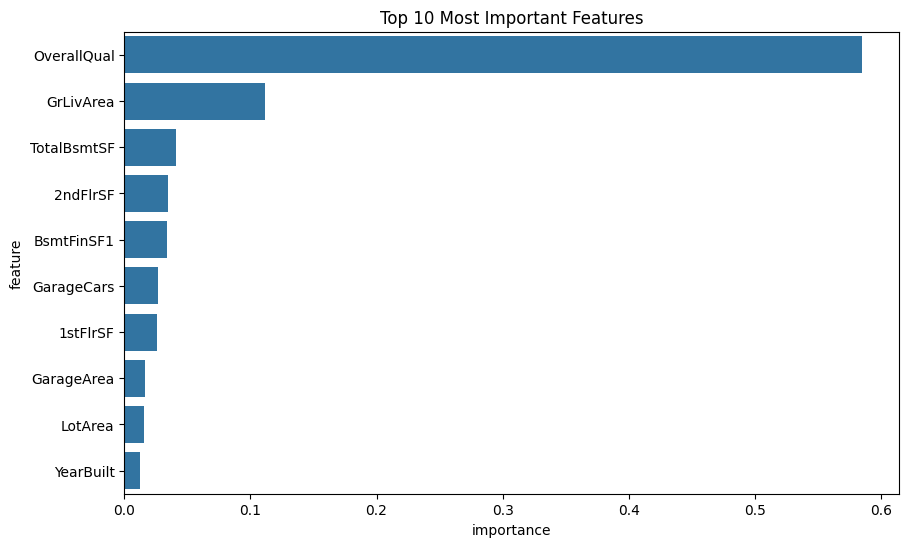

In [83]:
# Check if the length matches
if adjusted_X_train.shape[1] == len(feature_importance):
    # Create the DataFrame for feature importances
    adjusted_feature_names = feature_names[:adjusted_X_train.shape[1]]
    importance_df = pd.DataFrame({'feature': adjusted_feature_names, 'importance': feature_importance})
    importance_df = importance_df.sort_values('importance', ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance_df)
    plt.title('Top 10 Most Important Features')
    plt.show()
else:
    print("Error: Length of adjusted feature_names and feature_importance do not match.")


### Potential Improvements
1. Feature Engineering: Create new features or combine existing ones to capture more complex relationships.
2. Hyperparameter Tuning: Use techniques like Grid Search or Random Search to optimize model parameters.
3. Ensemble Methods: Combine predictions from multiple models to improve overall performance.
4. Cross-Validation: Implement k-fold cross-validation to get a more robust estimate of model performance.
5. Handle Outliers: Identify and treat outliers that might be affecting model performance.
6. Advanced Models: Experiment with more advanced models like XGBoost or LightGBM.

### Next Steps
1. Implement the suggested improvements and compare the results with the current models.
2. Perform predictions on the test set and submit the results.
3. Continue to iterate and refine the model based on feedback and performance on the test set.
